In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("Tweets.csv")
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [3]:
df.drop(('textID'), axis=1, inplace=True)
df.head(15)

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,2am feedings for the baby are fun when he is a...,fun,positive
7,Soooo high,Soooo high,neutral
8,Both of you,Both of you,neutral
9,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


In [4]:
df.isnull().sum()

text             1
selected_text    1
sentiment        0
dtype: int64

In [5]:
df.dropna(subset=['text', 'selected_text'], inplace=True)


In [6]:
df.isnull().sum()

text             0
selected_text    0
sentiment        0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
#convert some columns into category datatype
col=["sentiment"]
df[col]=df[col].astype('category')
pd.DataFrame(df.dtypes).T

,text,selected_text,sentiment
0,object,object,category


In [9]:
# show number of unique values in each column and their datatypes
dtypes=df.dtypes
nuniq=df.nunique()
pd.DataFrame({'dtypes':dtypes,'nunique':nuniq}).T

,text,selected_text,sentiment
dtypes,object,object,category
nunique,27480,22463,3


In [10]:
unique_values=df['sentiment'].unique()
print(unique_values)

['neutral', 'negative', 'positive']
Categories (3, object): ['negative', 'neutral', 'positive']


In [11]:
# Mapping sentiment to numbers directly in the DataFrame
df['sentiment'] = df['sentiment'].map({'negative': 1, 'neutral': 0, 'positive': 2})
df.head(10)

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,1
2,my boss is bullying me...,bullying me,1
3,what interview! leave me alone,leave me alone,1
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",1
5,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,0
6,2am feedings for the baby are fun when he is a...,fun,2
7,Soooo high,Soooo high,0
8,Both of you,Both of you,0
9,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,2


In [12]:
# =============================
# 📦 Import Libraries
# =============================
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# =============================
# 📥 Download NLTK Resources
# =============================
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# =============================
# 🔠 Helper Function: POS Tag Mapping
# =============================
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# =============================
# 🧹 Preprocessing Function
# =============================
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_tweet(tweet):
    tweet = str(tweet).lower()
    tweet = re.sub(r"http\S+|www.\S+", "", tweet)     # remove URLs
    tweet = re.sub(r"@\w+", "", tweet)                # remove mentions
    tweet = re.sub(r"#", "", tweet)                   # remove hashtags
    tweet = re.sub(r"[^a-z\s]", " ", tweet)           # remove punctuation/numbers
    tweet = re.sub(r"(.)\1{2,}", r"\1", tweet)        # remove repeated letters (cooool → cool)
    tweet = re.sub(r"\s+", " ", tweet).strip()        # remove extra spaces
    words = tweet.split()
    words = [lemmatizer.lemmatize(word, get_wordnet_pos(word))
             for word in words if word not in stop_words]
    return " ".join(words)

# =============================
# 🧽 Apply Preprocessing
# =============================
df['clean_text'] = df['text'].apply(clean_tweet)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mms2023\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mms2023\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mms2023\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mms2023\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mms2023\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


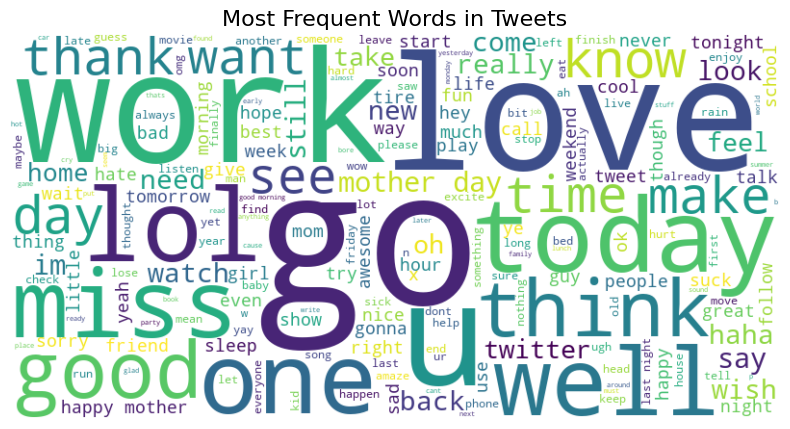

In [13]:
# =============================
# 🎨 WordCloud Visualization 
# =============================
all_words = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(all_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Tweets", fontsize=16)
plt.show()



Counts per Sentiment:
 sentiment
0    11117
2     8582
1     7781
Name: count, dtype: int64

Percentage per Sentiment:
 sentiment
0    40.454876
2    31.229985
1    28.315138
Name: proportion, dtype: float64


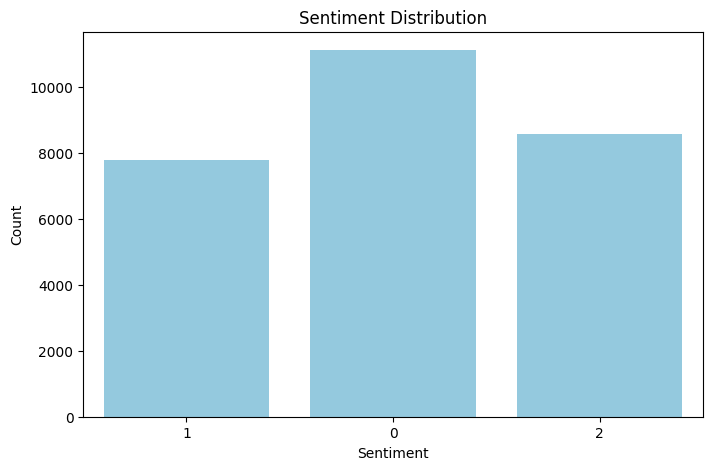

In [14]:
import seaborn as sns
# --- Counts per sentiment ---
Sentiment_counts = df['sentiment'].value_counts()
print("Counts per Sentiment:\n", Sentiment_counts)

# --- Percentage per sentiment ---
Sentiment_percentage = df['sentiment'].value_counts(normalize=True) * 100
print("\nPercentage per Sentiment:\n", Sentiment_percentage)

# --- Count plot with actual counts (same color for all bars) ---
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment', color='skyblue')  # same color for all bars
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

#  Convert text data into numerical form using TF-IDF
tfidf = TfidfVectorizer(max_features=50000, ngram_range=(1, 3))  
X = tfidf.fit_transform(df['clean_text'])
y = df['sentiment']

In [16]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Before balancing
print("Before SMOTE:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# After balancing
print("After SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({0: 11117, 2: 8582, 1: 7781})
After SMOTE: Counter({0: 11117, 1: 11117, 2: 11117})


In [17]:
# =============================
# ✂️ Train/Test Split
# =============================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=7)




In [18]:
# =============================
# 🤖 Train Support Vector Machine Model 
# =============================
from sklearn.svm import LinearSVC

model = LinearSVC(C=1) 
model.fit(X_train, y_train)




LinearSVC(C=1)

In [19]:
# =============================
# 📊 Evaluation
# =============================
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Train Accuracy: 0.9584707646176912
Test Accuracy: 0.7162344476090541

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.58      0.61      2181
           1       0.70      0.80      0.75      2258
           2       0.80      0.77      0.78      2232

    accuracy                           0.72      6671
   macro avg       0.72      0.71      0.71      6671
weighted avg       0.72      0.72      0.71      6671



In [20]:
# =============================
# ⚙️ Logistic Regression Model for Sentiment Analysis
# =============================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# 🧩 Split data into training and testing sets
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.15, random_state=7
    )

# -----------------------------
# 🧠 Create and train the Logistic Regression model
# -----------------------------
log_model = LogisticRegression(max_iter=6000, class_weight='balanced')
log_model.fit(X_train, y_train)

# -----------------------------
# 🔮 Make predictions
# -----------------------------
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

# -----------------------------
# 📊 Evaluate model performance
# -----------------------------
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Train Accuracy: 0.8656695357697192
Test Accuracy: 0.7227663401958825

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.65      0.64      1623
           1       0.72      0.77      0.74      1698
           2       0.82      0.74      0.78      1682

    accuracy                           0.72      5003
   macro avg       0.73      0.72      0.72      5003
weighted avg       0.73      0.72      0.72      5003



In [21]:
# =============================
# 🌲 Random Forest Model for Sentiment Analysis
# =============================
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib

# -----------------------------
# 🧩 Split data into training and testing sets
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.15, random_state=42
    )


# -----------------------------
# 🧠 Create and train the Random Forest model
# -----------------------------
rf_model = RandomForestClassifier(
    n_estimators=200,        # Number of trees in the forest
    max_depth=None,          # Let the model decide the best depth
)
rf_model.fit(X_train, y_train)

# -----------------------------
# 🔮 Make predictions
# -----------------------------
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# -----------------------------
# 📊 Evaluate model performance
# -----------------------------
print("✅ Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("✅ Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_test_pred))


✅ Train Accuracy: 0.995837448850007
✅ Test Accuracy: 0.751948830701579

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.68      0.67      1641
           1       0.80      0.76      0.78      1706
           2       0.79      0.82      0.81      1656

    accuracy                           0.75      5003
   macro avg       0.75      0.75      0.75      5003
weighted avg       0.75      0.75      0.75      5003



In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# =============================
# 🧩 Split data into train/test
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=7
)

# =============================
# 🌟 Initialize XGBoost Classifier
# =============================
xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
)

# =============================
# 🔧 Train the model
# =============================
xgb_model.fit(X_train, y_train)  # no sample weights

# =============================
# 🔮 Predictions
# =============================
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)  # predicted probabilities (confidence)

# =============================
# 📊 Evaluate performance
# =============================
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Train Accuracy: 0.7654422788605697
Test Accuracy: 0.71098785789237

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.78      0.67      2181
           1       0.79      0.61      0.69      2258
           2       0.82      0.74      0.78      2232

    accuracy                           0.71      6671
   macro avg       0.73      0.71      0.71      6671
weighted avg       0.73      0.71      0.71      6671



In [30]:
import joblib

# ✅ Save the trained Logistic Regression model
joblib.dump(xgb_model, 'xgb_model.joblib')
print("✅ xgb_model has been saved successfully: xgb_model.joblib")

# ✅ Save the fitted TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
print("✅ TF-IDF vectorizer has been saved successfully: tfidf_vectorizer.pkl")


✅ xgb_model has been saved successfully: xgb_model.joblib
✅ TF-IDF vectorizer has been saved successfully: tfidf_vectorizer.pkl
